# FT105 - Decision Trees
### By Lucas Domingos Monteiro
### RA 272387



### Dependency setup

In [ ]:
!pip install ucimlrepo

import pandas as pd
import matplotlib.pyplot as mpl
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

### Dataset processing, training, and decision tree induction

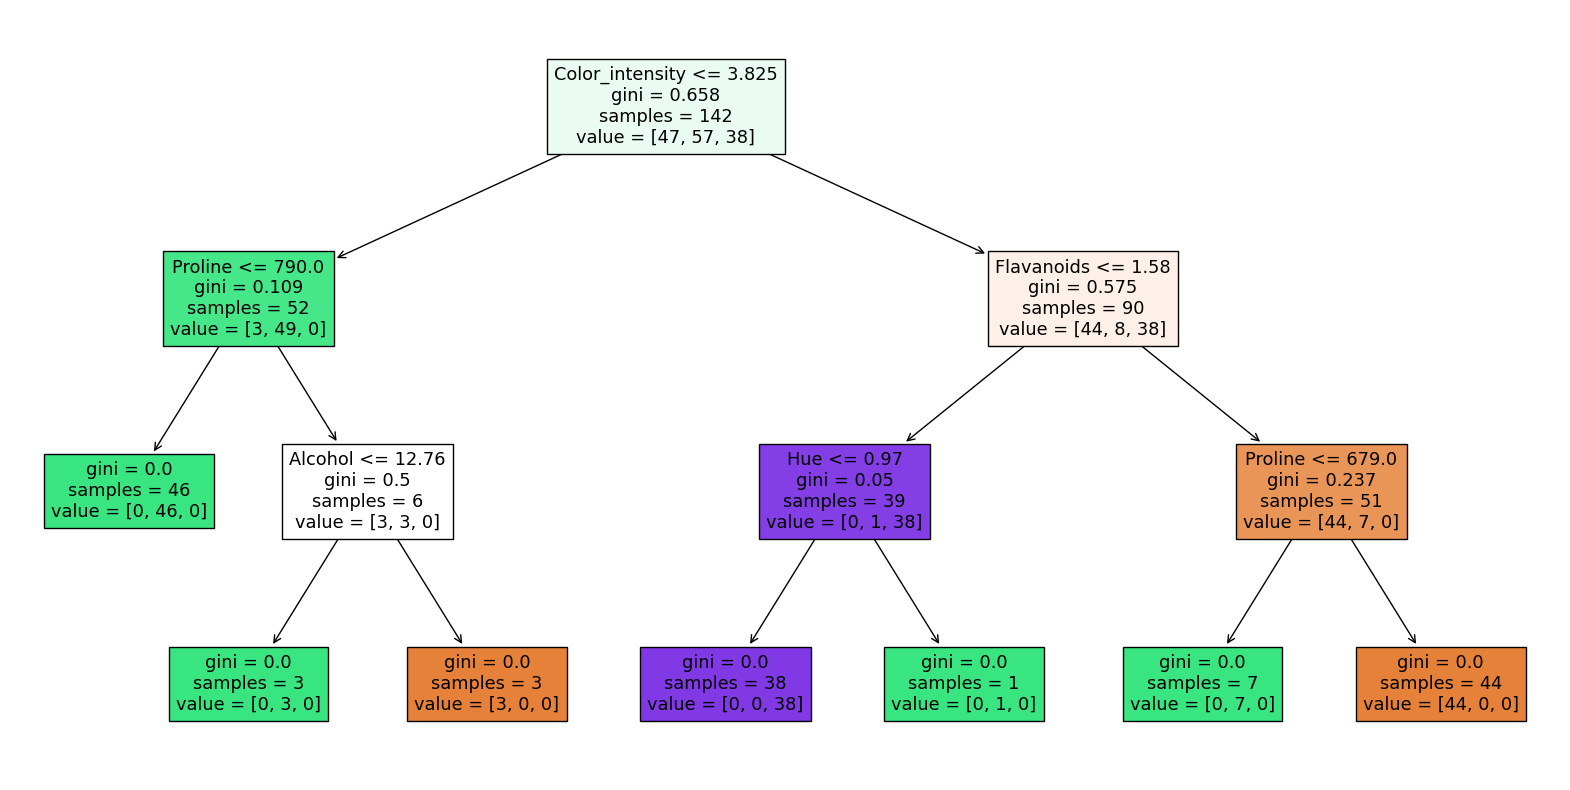

In [ ]:
wine_dataset = fetch_ucirepo(id=109)

features = wine_dataset.data.features
targets = wine_dataset.data.targets

# this is the seed for the random 80/20 split of the sets.
# first, done with 24, then with 105 (arbitrary values)
state = 105

# split 80/20
train_f, test_f, train_t, test_t = train_test_split(
    features,
    targets,
    test_size=0.2,
    random_state=state,
    stratify=targets)

# decision tree
clf = DecisionTreeClassifier()
clf.fit(train_f, train_t)
mpl.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features.columns.tolist(), filled=True)
mpl.show()

def process(set_f, set_t):
  pred = clf.predict(set_f)

  accuracy = accuracy_score(set_t, pred)

  tab = pd.DataFrame(set_t)
  tab['pred'] = pred
  errors = pd.DataFrame([row for i, row in tab.iterrows() if row['class'] != row['pred']])

  # output
  print("Accuracy:", accuracy)
  print(f"Errors: {len(errors)}/{len(set_t)}\nError list:\n{errors}")

### On testing set

In [ ]:
process(test_f, test_t)

Accuracy: 0.9444444444444444
Errors: 2/36
Error list:
    class  pred
81      2     1
73      2     1


### On training set

In [ ]:
process(train_f, train_t)

Accuracy: 1.0
Errors: 0/142
Error list:
Empty DataFrame
Columns: []
Index: []
